# PROJECT FUZZY LOGIC: PENENTUAN BENGKEL TERBAIK

**Mata Kuliah:** Kecerdasan Buatan  
**Topik:** Fuzzy Logic (Metode Sugeno)

---

## 1. Deskripsi Tugas
Program ini dibangun untuk menentukan **5 Bengkel Terbaik** berdasarkan data bengkel yang memiliki atribut **Kualitas Servis** dan **Harga**. 
Sistem menggunakan logika **Fuzzy Sugeno** untuk mengolah input menjadi skor kelayakan yang tegas (crisp value) untuk perankingan.

**Ketentuan:**
- Tidak menggunakan library Fuzzy eksternal (murni Python).
- Input: Data `bengkel.csv`.
- Output: 5 Bengkel dengan skor tertinggi.

## 2. Generate Dataset (Persiapan Data)
Langkah ini akan membuat file `bengkel.csv` berisi 100 data dummy (Acak) jika file belum ada. Data berisi ID, Skor Servis (1-100), dan Harga (1-100).

In [1]:
import csv
import random
import os

def generate_dataset(filename='bengkel.csv', num_data=100):
    # List Nama Bengkel 
    nama_bengkel_list = [
        'Bengkel Maju Jaya', 'Service Kilat 24Jam', 'AutoFix Pro', 'Mechanic Master',
        'Bengkel Sejahtera', 'Prima Motor Service', 'Bengkel Berkah', 'Speedy Fix',
        'Top Gear Workshop', 'Bengkel Amanah', 'Mitra Otomotif', 'Solusi Mesin',
        'Bengkel Handal', 'Turbo Charger', 'Bengkel Nusantara', 'Karya Mandiri',
        'Bengkel Bintang', 'Formula One Service', 'Bengkel Cepat', 'Dokter Mobil',
        'Bengkel Modern', 'Global Auto', 'Bengkel Sederhana', 'Raja Service',
        'Bengkel Utama', 'City Car Care', 'Bengkel Lestari', 'Dunia Otomotif',
        'Bengkel Terpercaya', 'Expert Auto Care', 'Bengkel Keluarga', 'Smart Mechanic',
        'Bengkel Juara', 'OtoPilot Service', 'Bengkel Gemilang', 'Max Power Auto'
    ]
    
    print(f"Membuat dataset '{filename}' dengan {num_data} data dummy...")
    with open(filename, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['nama_bengkel', 'servis', 'harga'])
        for i in range(num_data):
            # Gunakan nama dari list atau generate custom jika habis
            if i < len(nama_bengkel_list):
                nama = nama_bengkel_list[i]
            else:
                nama = f"Bengkel Partner {i+1}"
            
            servis = random.randint(1, 100)
            harga = random.randint(1, 100)
            writer.writerow([nama, servis, harga])
    print("Dataset berhasil dibuat!")

# Force regenerate dataset to apply changes
if os.path.exists('bengkel.csv'):
    os.remove('bengkel.csv')
generate_dataset()

Membuat dataset 'bengkel.csv' dengan 100 data dummy...
Dataset berhasil dibuat!


## 3. Desain dan Analisis Sistem (Fuzzy System Design)

### A. Variabel Input
1. **Servis (Kualitas Layanan)** - Range [1 - 100]
   - **Buruk**: Kurva Trapesium Turun (0, 0, 30, 50)
   - **Cukup**: Kurva Segitiga (40, 60, 80)
   - **Bagus**: Kurva Trapesium Naik (70, 85, 100, 100)

2. **Harga** - Range [1 - 100]
   - **Murah**: Kurva Trapesium Turun (0, 0, 20, 45)
   - **Sedang**: Kurva Segitiga (35, 55, 75)
   - **Mahal**: Kurva Trapesium Naik (65, 85, 100, 100)

### B. Variabel Output
1. **Kelayakan (Skor)** - Range [0 - 100] (Metode Sugeno Singleton)
   - **Rendah**: Nilai konstan `50`
   - **Menengah**: Nilai konstan `80`
   - **Tinggi**: Nilai konstan `100`

### C. Aturan Inferensi (Rule Base)
| Servis | Harga | Output (Skor) |
| :--- | :--- | :--- |
| Buruk | Murah | Rendah |
| Buruk | Sedang | Rendah |
| Buruk | Mahal | Rendah |
| Cukup | Murah | Menengah |
| Cukup | Sedang | Menengah |
| Cukup | Mahal | Rendah |
| Bagus | Murah | Tinggi |
| Bagus | Sedang | Tinggi |
| Bagus | Mahal | Menengah |


## 4. Visualisasi Fungsi Keanggotaan
Grafik ini menunjukkan bagaimana nilai input dipetakan ke dalam himpunan fuzzy.

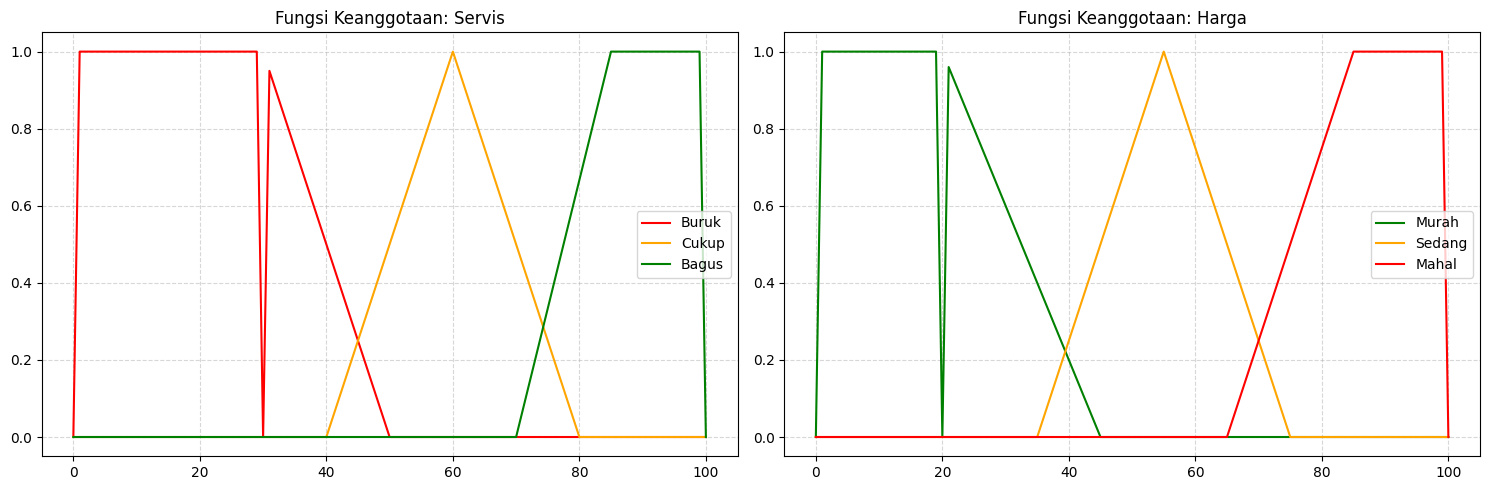

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def f_trapesium(x, a, b, c, d):
    if x <= a or x >= d: return 0
    elif a < x <= b: return (x - a) / (b - a)
    elif b < x < c: return 1
    elif c < x < d: return (d - x) / (d - c)
    return 0

def f_segitiga(x, a, b, c):
    if x <= a or x >= c: return 0
    elif a < x <= b: return (x - a) / (b - a)
    elif b < x < c: return (c - x) / (c - b)
    return 0

x_range = np.arange(0, 101, 1)
plt.figure(figsize=(15, 5))

# Plot Servis
plt.subplot(1, 2, 1)
plt.title("Fungsi Keanggotaan: Servis")
plt.plot(x_range, [f_trapesium(x, 0, 0, 30, 50) for x in x_range], label='Buruk', color='red')
plt.plot(x_range, [f_segitiga(x, 40, 60, 80) for x in x_range], label='Cukup', color='orange')
plt.plot(x_range, [f_trapesium(x, 70, 85, 100, 100) for x in x_range], label='Bagus', color='green')
plt.legend(); plt.grid(True, linestyle='--', alpha=0.5)

# Plot Harga
plt.subplot(1, 2, 2)
plt.title("Fungsi Keanggotaan: Harga")
plt.plot(x_range, [f_trapesium(x, 0, 0, 20, 45) for x in x_range], label='Murah', color='green')
plt.plot(x_range, [f_segitiga(x, 35, 55, 75) for x in x_range], label='Sedang', color='orange')
plt.plot(x_range, [f_trapesium(x, 65, 85, 100, 100) for x in x_range], label='Mahal', color='red')
plt.legend(); plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(); plt.show()

## 5. Implementasi Logika Fuzzy
Kode inti untuk Fuzzification, Inference, dan Defuzzification.

In [15]:
# --- FUZZIFICATION ---
def fuzzifikasi_servis(nilai):
    return {
        'buruk': f_trapesium(nilai, 0, 0, 30, 50),
        'cukup': f_segitiga(nilai, 40, 60, 80),
        'bagus': f_trapesium(nilai, 70, 85, 100, 100)
    }
def fuzzifikasi_harga(nilai):
    return {
        'murah': f_trapesium(nilai, 0, 0, 20, 45),
        'sedang': f_segitiga(nilai, 35, 55, 75),
        'mahal': f_trapesium(nilai, 65, 85, 100, 100)
    }

# --- INFERENCE (SUGENO) ---
def inferensi(f_servis, f_harga):
    Z_RENDAH = 50; Z_MENENGAH = 80; Z_TINGGI = 100
    rules = []
    def add_rule(alpha, z): 
        if alpha > 0: rules.append((alpha, z))
    
    # Rules Mapping
    add_rule(min(f_servis['buruk'], f_harga['murah']), Z_RENDAH)
    add_rule(min(f_servis['buruk'], f_harga['sedang']), Z_RENDAH)
    add_rule(min(f_servis['buruk'], f_harga['mahal']), Z_RENDAH)
    add_rule(min(f_servis['cukup'], f_harga['murah']), Z_MENENGAH)
    add_rule(min(f_servis['cukup'], f_harga['sedang']), Z_MENENGAH)
    add_rule(min(f_servis['cukup'], f_harga['mahal']), Z_RENDAH)
    add_rule(min(f_servis['bagus'], f_harga['murah']), Z_TINGGI)
    add_rule(min(f_servis['bagus'], f_harga['sedang']), Z_TINGGI)
    add_rule(min(f_servis['bagus'], f_harga['mahal']), Z_MENENGAH)
    return rules

# --- DEFUZZIFICATION ---
def defuzzifikasi(rules):
    pembilang = sum(a * z for a, z in rules)
    penyebut = sum(a for a, z in rules)
    return pembilang / penyebut if penyebut != 0 else 0

## 6. Simulasi & Debugging (Step-by-Step)
Bagian ini mendemonstrasikan proses perhitungan fuzzy secara manual (langkah demi langkah) untuk memastikan logika berjalan benar.

In [ ]:
# --- TESTING DENGAN DATA DUMMY ---

test_servis = 60
test_harga = 40

print(f"--- Hasil Fuzzifikasi untuk Bengkel Test ---")
print(f"Nilai Servis: {test_servis}")
hasil_fuzzy_servis = fuzzifikasi_servis(test_servis)
print(f"Derajat Keanggotaan Servis: {hasil_fuzzy_servis}")

print(f"\nNilai Harga: {test_harga}")
hasil_fuzzy_harga = fuzzifikasi_harga(test_harga)
print(f"Derajat Keanggotaan Harga: {hasil_fuzzy_harga}")

# Contoh kalau punya banyak data dalam list (Simulasi Dataset)
# UPDATE: Menggunakan Nama Bengkel
data_dummy_demo = [
    {'nama': 'Bengkel A', 'servis': 20, 'harga': 80},
    {'nama': 'Bengkel B', 'servis': 90, 'harga': 30},
]

print(f"\n--- Testing Multiple Data ---")
for bengkel in data_dummy_demo:
    fz_s = fuzzifikasi_servis(bengkel['servis'])
    fz_h = fuzzifikasi_harga(bengkel['harga'])
    print(f"Bengkel {bengkel['nama']} -> Servis: {fz_s}, Harga: {fz_h}")

def hitung_skor_demo(fz_servis, fz_harga):
    # Definisi nilai output (Sugeno Singleton) sesuai project
    Z_RENDAH = 50
    Z_MENENGAH = 80
    Z_TINGGI = 100
    
    aturan = []
    
    # Mapping 9 Rules (Sesuai Desain Awal)
    aturan.append((min(fz_servis['buruk'], fz_harga['murah']), Z_RENDAH))
    aturan.append((min(fz_servis['buruk'], fz_harga['sedang']), Z_RENDAH))
    aturan.append((min(fz_servis['buruk'], fz_harga['mahal']), Z_RENDAH))
    aturan.append((min(fz_servis['cukup'], fz_harga['murah']), Z_MENENGAH))
    aturan.append((min(fz_servis['cukup'], fz_harga['sedang']), Z_MENENGAH))
    aturan.append((min(fz_servis['cukup'], fz_harga['mahal']), Z_RENDAH))
    aturan.append((min(fz_servis['bagus'], fz_harga['murah']), Z_TINGGI))
    aturan.append((min(fz_servis['bagus'], fz_harga['sedang']), Z_TINGGI))
    aturan.append((min(fz_servis['bagus'], fz_harga['mahal']), Z_MENENGAH))
    
    pembilang = sum(a * z for a, z in aturan)
    penyebut = sum(a for a, z in aturan)
    
    return pembilang / penyebut if penyebut != 0 else 0

# 3. Inferensi & Defuzzifikasi (Langkah demo)
skor = hitung_skor_demo(hasil_fuzzy_servis, hasil_fuzzy_harga)
print(f"\nSkor Kelayakan Akhir (Demo): {skor:.2f}")


--- Hasil Fuzzifikasi untuk Bengkel Test ---
Nilai Servis: 60
Derajat Keanggotaan Servis: {'buruk': 0, 'cukup': 1.0, 'bagus': 0}

Nilai Harga: 40
Derajat Keanggotaan Harga: {'murah': 0.2, 'sedang': 0.25, 'mahal': 0}

--- Testing Multiple Data ---
Bengkel Bengkel A -> Servis: {'buruk': 1, 'cukup': 0, 'bagus': 0}, Harga: {'murah': 0, 'sedang': 0, 'mahal': 0.75}
Bengkel Bengkel B -> Servis: {'buruk': 0, 'cukup': 0, 'bagus': 1}, Harga: {'murah': 0.6, 'sedang': 0, 'mahal': 0}

Skor Kelayakan Akhir (Demo): 80.00


## 7. Visualisasi 3D Surface Plot (The Amazing Part)
Diagram 3D ini menunjukkan hubungan antara **Servis**, **Harga**, dan **Skor Kelayakan**. 
- Sumbu X: Servis (0-100)
- Sumbu Y: Harga (0-100)
- Sumbu Z: Skor Output (0-100)
Warna menunjukkan tingkat kelayakan (Hijau = Tinggi, Merah = Rendah).

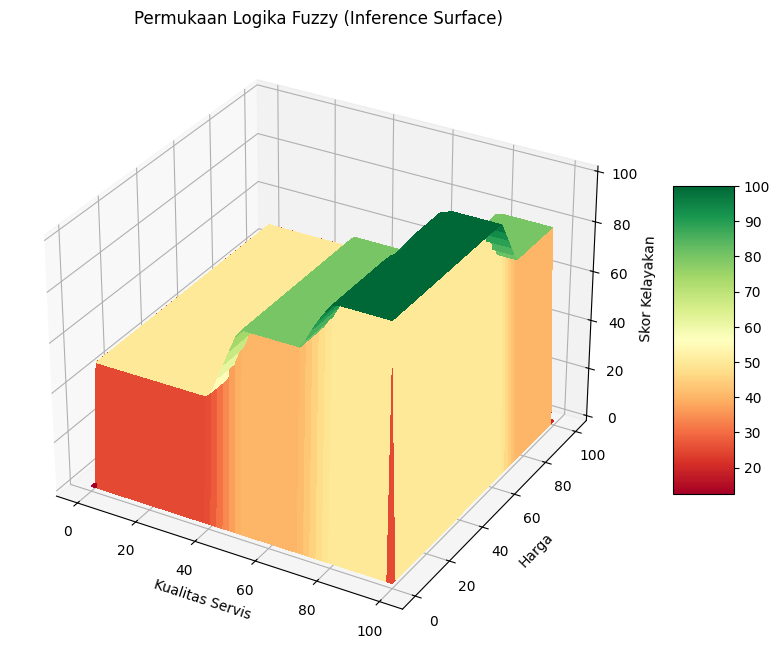

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_3d_surface():
    # Generate grid points
    servis_range = np.linspace(0, 100, 50)
    harga_range = np.linspace(0, 100, 50)
    X, Y = np.meshgrid(servis_range, harga_range)
    Z = np.zeros_like(X)

    # Calculate fuzzy score for each point
    for i in range(len(servis_range)):
        for j in range(len(harga_range)):
            s = X[i, j]
            h = Y[i, j]
            rules = inferensi(fuzzifikasi_servis(s), fuzzifikasi_harga(h))
            Z[i, j] = defuzzifikasi(rules)

    # Plot 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.RdYlGn, linewidth=0, antialiased=False)

    ax.set_xlabel('Kualitas Servis')
    ax.set_ylabel('Harga')
    ax.set_zlabel('Skor Kelayakan')
    ax.set_title('Permukaan Logika Fuzzy (Inference Surface)')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

plot_3d_surface()

## 8. Main Program & Result Charts
Menjalankan perhitungan dan menampilkan grafik batang 5 bengkel terbaik.

--- DAFTAR 5 BENGKEL TERBAIK (Professional) ---

Nama Bengkel              | Servis   | Harga    | Skor      
------------------------------------------------------------
Bengkel Maju Jaya         | 92.0     | 8.0      | 100.0000
Mitra Otomotif            | 91.0     | 5.0      | 100.0000
Bengkel Nusantara         | 98.0     | 33.0     | 100.0000
Bengkel Cepat             | 97.0     | 53.0     | 100.0000
Raja Service              | 98.0     | 7.0      | 100.0000


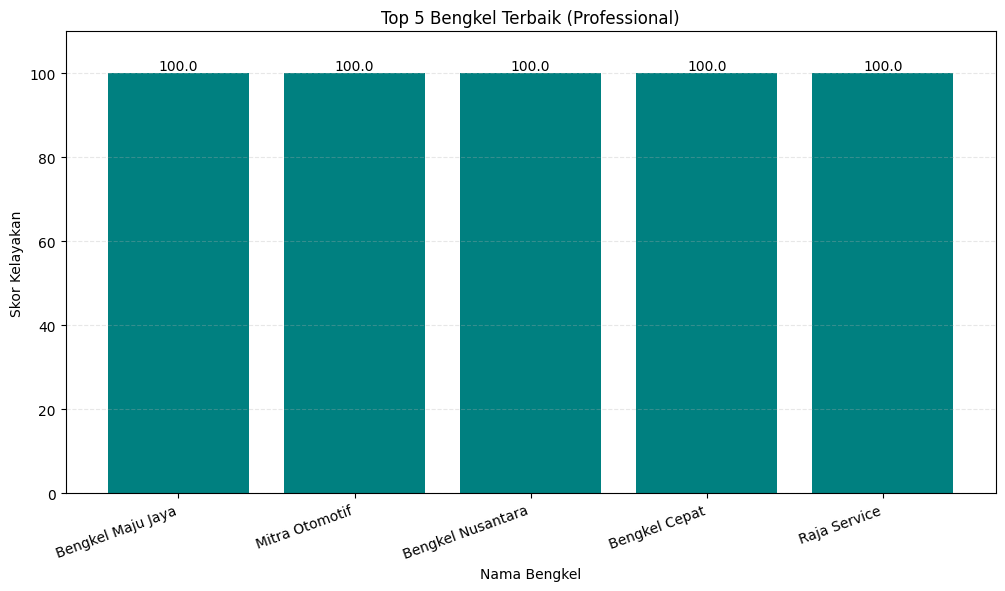


Data tersimpan ke 'peringkat_bengkel.csv'


In [ ]:
def main():
    print("--- DAFTAR 5 BENGKEL TERBAIK (Professional) ---\n")
    file_input = 'bengkel.csv'
    data_bengkel = []
    
    try:
        with open(file_input, mode='r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                nama = row['nama_bengkel']
                servis = float(row['servis'])
                harga = float(row['harga'])
                
                rules = inferensi(fuzzifikasi_servis(servis), fuzzifikasi_harga(harga))
                skor = defuzzifikasi(rules)
                
                data_bengkel.append({'nama': nama, 'servis': servis, 'harga': harga, 'skor': skor})
                
        # Sorting Descending
        data_bengkel.sort(key=lambda x: x['skor'], reverse=True)
        
        # Top 5 Display
        top_5 = data_bengkel[:5]
        # Adjusted width for Name
        print(f"{'Nama Bengkel':<25} | {'Servis':<8} | {'Harga':<8} | {'Skor':<10}")
        print("-" * 60)
        for b in top_5:
            print(f"{b['nama']:<25} | {b['servis']:<8} | {b['harga']:<8} | {b['skor']:.4f}")
            
        # Bar Chart Visualization
        names = [b['nama'] for b in top_5]
        scores = [b['skor'] for b in top_5]
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(names, scores, color='teal')
        plt.xlabel('Nama Bengkel')
        plt.ylabel('Skor Kelayakan')
        plt.title('Top 5 Bengkel Terbaik (Professional)')
        plt.ylim(0, 110)
        
        # Flatten x-labels if names are long
        plt.xticks(rotation=20, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        
        # Add text labels
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height, 
                     f'{height:.1f}', ha='center', va='bottom')
        plt.show()
        
        # Save output
        with open('peringkat_bengkel.csv', 'w', newline='') as f:
            # Update fieldnames
            writer = csv.DictWriter(f, fieldnames=['nama', 'servis', 'harga', 'skor'])
            writer.writeheader()
            writer.writerows(data_bengkel)
        print("\nData tersimpan ke 'peringkat_bengkel.csv'")
        
    except FileNotFoundError: print("File input tidak ditemukan!")
    except KeyError: print("Format CSV salah! Pastikan kolom 'nama_bengkel' ada.")

if __name__ == "__main__":
    main()
